In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [112]:
df=pd.read_csv(r'C:\Users\raypr\OneDrive\Desktop\scaler_dataset\netflix.csv')

In [113]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [115]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [116]:
df.shape

(8807, 12)

#### Lets Drop show_id and description columns as we dont need them for our analysis

In [117]:
df.drop(columns=['show_id','description'],inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


#### Remove Min and Season from Duration Columns as we dont need them for our analysis

In [118]:
df['duration']=df['duration'].str.split(' ',expand=True)[0]

In [119]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


### Treating Missing Value

In [120]:
df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

1.rating-For Rating column we can calculate mean of rating for that listed_in and cast and director columns
2.duration-mean based on type
3.date-mode of month and date and for year use release year column
4.country-for country we can use director name to filter out country
5.cast-use director and type to filter
6.director-mode of director filtering by listed_in 

In [121]:
df['duration']=df['duration'].astype('Int64')

In [122]:
def func(x,TVshow_duration_value,movie_duration_value):
    if pd.isna(x['duration']):
        if x['type']=='Movie':
            return movie_duration_value
        else:
            return TVshow_duration_value
    return x

In [123]:
movie_duration_value=math.ceil(df.groupby('type')['duration'].aggregate('mean')[0])
movie_duration_value

100

In [124]:
TVshow_duration_value=math.ceil(df.groupby('type')['duration'].aggregate('mean')[1])
TVshow_duration_value

2

In [125]:
df=df.apply(func,args=[TVshow_duration_value,movie_duration_value],axis=1)

#### Replacing null value in rating column with mode

In [126]:
df[df['rating'].isna()]   

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5989,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37,Movies
6827,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1,"Anime Series, International TV Shows"
7312,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1,"Kids' TV, TV Comedies"
7537,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115,Dramas


In [127]:
#Director is also not present where rating is null so we will replace Null value in Rating column with Mode

In [128]:
df['rating'].fillna(df['rating'].mode()[0], inplace = True)

In [129]:
df['rating'].isna().sum()

0

#### converting Date to correct format

In [130]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."


In [131]:
temp={'January':'01','December':'12','September':'09','April':'04','February':'02',
      'June':'06','October':'10','May':'05','August':'08','March':'03','July':'7','November':'11'}

In [132]:
def func1(x):
    try:
        return pd.to_datetime(x.split(', ')[1]+'-'+str(temp[x.split(', ')[0].split(' ')[0]])+'-'+x.split(', ')[0].split(' ')[1])
    except:
        return None

In [133]:
df['date']=df.date_added.apply(func1)

In [134]:
df['date']=df.date.fillna(df.date.mode()[0])

In [135]:
df.date.isna().sum()

0

In [136]:
df.drop(columns='date_added',inplace=True)

In [137]:
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,date
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90,Documentaries,2021-09-25
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1,"Docuseries, Reality TV",2021-09-24
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24


#### unnesting director for each title

In [138]:
df_td=df[['title','director']]
df1=df_td['director'].str.split(',',expand=True).reset_index()
df_td=df_td.reset_index()
df_td=df_td.merge(df1,on='index')
df_td=pd.melt(frame=df_td,id_vars =['index','title','director'])
df_td.drop('variable',axis=1,inplace=True)

In [139]:
def func(x):
    if x['value'].isna().sum()==13:
        x=x.drop_duplicates()
    else:
        x=x[~x['value'].isna()]
    return x

In [140]:
df_td=df_td.groupby('title').apply(func)
df_td.drop('director',axis=1,inplace=True)
df_td=df_td.reset_index(drop=True)
df_td.columns=['index','title','directors']
df_td

,index,title,directors
0,2036,#Alive,Cho Il
1,2304,#AnneFrank - Parallel Stories,Sabina Fedeli
2,2304,#AnneFrank - Parallel Stories,Anna Migotto
3,2481,#FriendButMarried,Rako Prijanto
4,2324,#FriendButMarried 2,Rako Prijanto
...,...,...,...
9604,6177,忍者ハットリくん,NaN
9605,4914,海的儿子,NaN
9606,7101,마녀사냥,NaN
9607,5022,반드시 잡는다,Hong-seon Kim


#### unnesting Genre for each title

In [141]:
df_tg=df[['title','listed_in']]
df1=df_tg['listed_in'].str.split(',',expand=True).reset_index()
df_tg=df_tg.reset_index()
df_tg=df_tg.merge(df1,on='index')
df_tg=pd.melt(frame=df_tg,id_vars =['index','title','listed_in'])
df_tg.drop('variable',axis=1,inplace=True)

In [142]:
def func(x):
    if x['value'].isna().sum()==3:
        x=x.drop_duplicates()
    else:
        x=x[~x['value'].isna()]
    return x

In [143]:
df_tg=df_tg.groupby('title').apply(func)
df_tg.drop('listed_in',axis=1,inplace=True)
df_tg=df_tg.reset_index(drop=True)
df_tg.columns=['index','title','genres']
df_tg

,index,title,genres
0,2036,#Alive,Horror Movies
1,2036,#Alive,International Movies
2,2036,#Alive,Thrillers
3,2304,#AnneFrank - Parallel Stories,Documentaries
4,2304,#AnneFrank - Parallel Stories,International Movies
...,...,...,...
19315,7101,마녀사냥,Stand-Up Comedy & Talk Shows
19316,5022,반드시 잡는다,Dramas
19317,5022,반드시 잡는다,International Movies
19318,5022,반드시 잡는다,Thrillers


#### unnesting cast for each title

In [144]:
df_tc=df[['title','cast']]
df1=df_tc['cast'].str.split(',',expand=True).reset_index()
df_tc=df_tc.reset_index()
df_tc=df_tc.merge(df1,on='index')
df_tc=pd.melt(frame=df_tc,id_vars =['index','title','cast'])
df_tc.drop('variable',axis=1,inplace=True)

In [145]:
def func(x):
    if x['value'].isna().sum()==50:
        x=x.drop_duplicates()
    else:
        x=x[~x['value'].isna()]
    return x

In [146]:
df_tc=df_tc.groupby('title').apply(func)
df_tc.drop('cast',axis=1,inplace=True)
df_tc=df_tc.reset_index(drop=True)
df_tc.columns=['index','title','cast']
df_tc

,index,title,cast
0,2036,#Alive,Yoo Ah-in
1,2036,#Alive,Park Shin-hye
2,2304,#AnneFrank - Parallel Stories,Helen Mirren
3,2304,#AnneFrank - Parallel Stories,Gengher Gatti
4,2481,#FriendButMarried,Adipati Dolken
...,...,...,...
64943,7108,최강전사 미니특공대 : 영웅의 탄생,Yang Jeong-hwa
64944,7108,최강전사 미니특공대 : 영웅의 탄생,Jeon Tae-yeol
64945,7108,최강전사 미니특공대 : 영웅의 탄생,Shin Yong-woo
64946,7108,최강전사 미니특공대 : 영웅의 탄생,Lee So-young


#### unnesting Country for each title

In [147]:
df_tcc=df[['title','country']]
df1=df_tcc['country'].str.split(',',expand=True).reset_index()
df_tcc=df_tcc.reset_index()
df_tcc=df_tcc.merge(df1,on='index')
df_tcc=pd.melt(frame=df_tcc,id_vars =['index','title','country'])
df_tcc.drop('variable',axis=1,inplace=True)

In [148]:
def func(x):
    if x['value'].isna().sum()==12:
        x=x.drop_duplicates()
    else:
        x=x[~x['value'].isna()]
    return x

In [149]:
df_tcc=df_tcc.groupby('title').apply(func)
df_tcc.drop('country',axis=1,inplace=True)
df_tcc=df_tcc.reset_index(drop=True)
df_tcc.columns=['index','title','country']
df_tcc

,index,title,country
0,2036,#Alive,South Korea
1,2304,#AnneFrank - Parallel Stories,Italy
2,2481,#FriendButMarried,Indonesia
3,2324,#FriendButMarried 2,Indonesia
4,5973,#Roxy,Canada
...,...,...,...
10842,6177,忍者ハットリくん,Japan
10843,4914,海的儿子,NaN
10844,7101,마녀사냥,South Korea
10845,5022,반드시 잡는다,South Korea


#### Avg Duration for TV-Show and Movies 

In [150]:
avg_duration=df[['type','duration']]

In [151]:
avg_duration.type.unique()

array(['Movie', 'TV Show', 100], dtype=object)

In [152]:
avg_duration = avg_duration.drop(avg_duration[avg_duration['type']==100].index)

In [153]:
avg_duration.groupby('type')['duration'].mean().reset_index()

,type,duration
0,Movie,99.577187
1,TV Show,1.764948


### Non-Graphical Analysis: Value counts and unique attributes

In [154]:
df_tc.cast.value_counts()

 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
                     ..
 Surbhi Mahendru      1
 Gerson Da Cunha      1
 Subhashini Ali       1
 Umesh Mehra          1
 So-yeon              1
Name: cast, Length: 39295, dtype: int64

In [155]:
len(df_tc.cast.unique())        # No of Unique cast

39296

In [156]:
df_td.directors.value_counts()

Rajiv Chilaka     22
 Jan Suter        18
Raúl Campos       18
Marcus Raboy      16
Suhas Kadav       16
                  ..
André Odendaal     1
 Johan Vorster     1
John Whitesell     1
Neri Parenti       1
Young Jun Lee      1
Name: directors, Length: 5119, dtype: int64

In [157]:
len(df_td.directors.unique())      # No of Unique directors

5120

In [158]:
df_tcc['country'].value_counts()

United States     3208
India             1008
United Kingdom     628
 United States     479
Canada             271
                  ... 
 Ecuador             1
 Botswana            1
Puerto Rico          1
 Vatican City        1
 Montenegro          1
Name: country, Length: 197, dtype: int64

In [159]:
len(df_tcc.country.unique())      # No of Unique country

198

In [160]:
df_tg.genres.value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
Sports Movies                   1
TV Sci-Fi & Fantasy             1
LGBTQ Movies                    1
Name: genres, Length: 73, dtype: int64

In [161]:
len(df_tg.genres.unique())      # No of Unique genre

73

#### Merging all individual dataset 

In [162]:
df_tdc=df_td.merge(df_tc,on='title')
df_tdcg=df_tdc.merge(df_tg,on='title')
df_tdcgc=df_tdcg.merge(df_tcc,on='title')

C:\Users\raypr\AppData\Local\Temp\ipykernel_6324\1895487294.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_tdcgc=df_tdcg.merge(df_tcc,on='title')


In [163]:
df.drop(['director','cast','listed_in','country'],axis=1,inplace=True)

In [164]:
df_combined=df_tdcgc.merge(df,on='title')

In [165]:
df_combined.drop(['index_x','index_y'],axis=1,inplace=True)

In [166]:
df_combined

,title,directors,cast,genres,country,type,release_year,rating,duration,date
0,#Alive,Cho Il,Yoo Ah-in,Horror Movies,South Korea,Movie,2020,TV-MA,99,2020-09-08
1,#Alive,Cho Il,Yoo Ah-in,International Movies,South Korea,Movie,2020,TV-MA,99,2020-09-08
2,#Alive,Cho Il,Yoo Ah-in,Thrillers,South Korea,Movie,2020,TV-MA,99,2020-09-08
3,#Alive,Cho Il,Park Shin-hye,Horror Movies,South Korea,Movie,2020,TV-MA,99,2020-09-08
4,#Alive,Cho Il,Park Shin-hye,International Movies,South Korea,Movie,2020,TV-MA,99,2020-09-08
...,...,...,...,...,...,...,...,...,...,...
202057,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,Yang Jeong-hwa,Children & Family Movies,NaN,Movie,2018,TV-Y7,68,2018-09-01
202058,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,Jeon Tae-yeol,Children & Family Movies,NaN,Movie,2018,TV-Y7,68,2018-09-01
202059,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,Shin Yong-woo,Children & Family Movies,NaN,Movie,2018,TV-Y7,68,2018-09-01
202060,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,Lee So-young,Children & Family Movies,NaN,Movie,2018,TV-Y7,68,2018-09-01


In [167]:
df_combined[['country']].isna().sum()

country    11897
dtype: int64

#### Fill Missing value in Cast and director column with mode

In [168]:
df_combined['cast'].fillna(df_combined['cast'].mode()[0], inplace = True)

In [169]:
df_combined['directors'].fillna(df_combined['directors'].mode()[0], inplace = True)

#### Multiple Imputation for Country column

In [170]:
df_temp=df_combined[['country','cast']]
df_temp=df_temp.groupby('cast', group_keys=False)['country'].agg(pd.Series.mode).reset_index()

In [171]:
def func(x,y,z):
    try:
        value=y.loc[y[y['cast']==x['cast']]['country'].index[0]]['country']
        if type(value)==str:
            x['country']=value
        elif type(value)==list and len(value)>0:
            x['country']=value[0]
        else:
            x['country']=z
    except:
        x['country']=z
    return x

In [172]:
z=df_combined['country'].mode()[0]
df_combined[['cast','country']]=df_combined[['cast','country']].apply(lambda x:func(x,df_temp,z) if(str(x[1]) == 'nan') else x, axis = 1)

In [173]:
df_combined.isna().sum()

title           0
directors       0
cast            0
genres          0
country         0
type            0
release_year    0
rating          0
duration        0
date            0
dtype: int64

In [174]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202062 entries, 0 to 202061
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         202062 non-null  object        
 1   directors     202062 non-null  object        
 2   cast          202062 non-null  object        
 3   genres        202062 non-null  object        
 4   country       202062 non-null  object        
 5   type          202062 non-null  object        
 6   release_year  202062 non-null  int64         
 7   rating        202062 non-null  object        
 8   duration      202062 non-null  int64         
 9   date          202062 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 17.0+ MB


In [175]:
df_combined.describe()

,release_year,duration
count,202062.000000,202062.000000
mean,2013.448941,77.687873
std,9.013675,51.482097
min,1925.000000,1.000000
25%,2012.000000,4.000000
50%,2016.000000,95.000000
75%,2019.000000,112.000000
max,2021.000000,312.000000


In [176]:
# we dont have features like Revenue,Views,other customer details so we will use rating column in our analysis

### Number of movies released per year

In [177]:
df_movie=df_combined[['title','release_year','type','duration','rating']].drop_duplicates()

In [178]:
df_title_count=df_movie.groupby(['release_year','type'])['title'].nunique().reset_index()

Converting Release_year to bins having 10 year gap

In [179]:
def year_bin(df_title_count,cut_points,labels):
    ma=df_title_count.release_year.max()
    mi=df_title_count.release_year.min()
    break_points=[mi]+cut_points+[ma]
    Bin=pd.cut(df_title_count.release_year,bins=break_points,labels=labels,include_lowest=True)
    return Bin

In [180]:
cut_points=[1935,1945,1955,1965,1975,1985,1995,2005,2015]
labels=['1925-1935','1935-1945','1945-1955','1955-1965','1965-1975','1975-1985','1985-1995','1995-2005','2005-2015','2015-2023']
df_title_count['bin_year']=year_bin(df_title_count,cut_points,labels)

In [181]:
df_bin=df_title_count.groupby(['bin_year','type'])['title'].sum().reset_index()

### Comparison of tv shows vs. movies

In [182]:
x=df_combined[['title','type']].drop_duplicates()
x=x.groupby('type')['title'].nunique().reset_index()
x

,type,title
0,Movie,6128
1,TV Show,2676


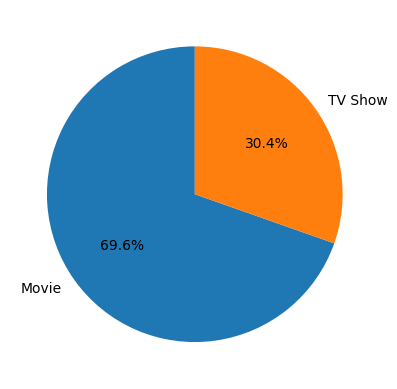

In [183]:
plt.pie(x['title'], labels = x['type'], autopct='%1.1f%%', startangle=90)
plt.show() 

#### Here if we compare 2005-2015 with 2015-2023 movie has increased 107% and Tv show has increased 275%

In [184]:
df_bin.pivot(index='type', columns='bin_year', values='title')

bin_year,1925-1935,1935-1945,1945-1955,1955-1965,1965-1975,1975-1985,1985-1995,1995-2005,2005-2015,2015-2023
type,,,,,,,,,,
Movie,0,11,7,19,44,104,172,409,1744,3618
TV Show,1,1,1,1,3,4,20,66,542,2037


->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Increasing 

In [185]:
movie_percentage_increment=(3618-1744)/1744*100
movie_percentage_increment

107.45412844036697

In [186]:
Tvshow_percentage_increment=(2037-542)/542*100
Tvshow_percentage_increment

275.83025830258305

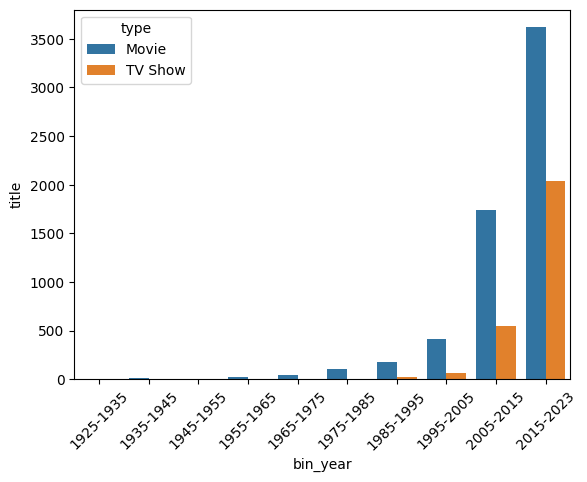

In [187]:
sns.barplot(data=df_bin, x='bin_year', y='title', hue='type')
plt.xticks(rotation=45)
plt.show()

% of TvShow has been increasing rapidly but No of movie release is still more than tvshows

#### In recent year TV Show has increased 275% and Movies has increased 107% that means Netflix has more focus on TV Shows than movies in recent years

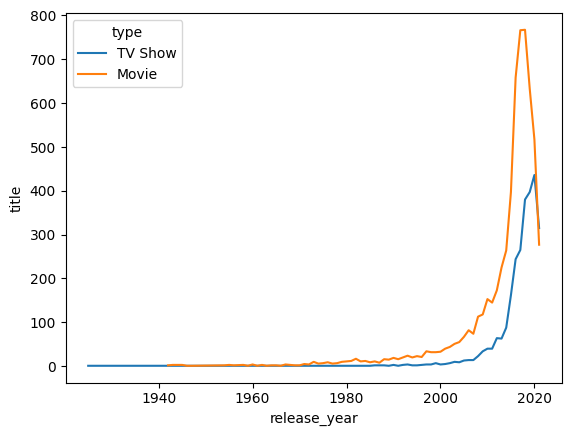

In [188]:
sns.lineplot(data=df_title_count, x='release_year', y="title",hue='type')
plt.show()

#### Best time to launch a TV show

#### Netflix is Launching maximum of TV Show in January and december

In [189]:
df_combined[df_combined['type']=='TV Show']['date'].dt.month.reset_index(drop=True).value_counts()

1     5687
12    5341
7     5129
8     5029
6     4959
9     4818
4     4460
11    4428
3     4201
10    4199
5     4111
2     3786
Name: date, dtype: int64

### Understanding what content is available in different countries

#### According to the data that india has high demand for international Movies.

In [190]:
data_cg=df_combined.groupby(['country','genres'])['title'].nunique().reset_index()
data_cg.columns=['country','genres','movie_count']
data_cg.sort_values('movie_count',ascending=False).head(10)

,country,genres,movie_count
1560,India,International Movies,837
2423,United States,Documentaries,496
2425,United States,Dramas,495
2420,United States,Comedies,433
1589,India,Dramas,415
2417,United States,Children & Family Movies,406
2413,United States,Action & Adventure,357
2388,United States,Independent Movies,329
2385,United States,Dramas,275
1584,India,Comedies,274


#### Demands in United States

In [191]:
data_cg[data_cg['country']=='United States'].sort_values('movie_count',ascending=False).head()

,country,genres,movie_count
2423,United States,Documentaries,496
2425,United States,Dramas,495
2420,United States,Comedies,433
2417,United States,Children & Family Movies,406
2413,United States,Action & Adventure,357


#### Highest demands in each Country

In [192]:
temp=data_cg.groupby('country')['movie_count'].max().reset_index()
temp.sort_values('movie_count',ascending=False).head()

,country,movie_count
141,India,837
191,United States,496
190,United Kingdom,219
148,Japan,154
179,South Korea,138


In [193]:
data_cg.groupby('country',as_index=False).max().sort_values('movie_count',ascending=False).head()

,country,genres,movie_count
141,India,TV Shows,837
191,United States,Thrillers,496
190,United Kingdom,Thrillers,219
148,Japan,TV Shows,154
179,South Korea,Stand-Up Comedy,138


### which rating show increasing these days

In [194]:
df_movie['rating'].unique()

array(['TV-MA', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG-13', 'TV-Y', 'R',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [195]:
df_title_count_rating=df_movie.groupby(['release_year','rating'])['title'].count().reset_index()
df_title_count_rating.sort_values('title',ascending=False)

,release_year,rating,title
403,2018,TV-MA,549
414,2019,TV-MA,500
424,2020,TV-MA,469
391,2017,TV-MA,452
378,2016,TV-MA,341
...,...,...,...
199,1997,TV-Y7,1
103,1983,PG,1
97,1981,TV-Y7,1
96,1981,TV-PG,1


In [196]:
df_title_count_rating['bin_year']=year_bin(df_title_count_rating,cut_points,labels)

In [197]:
df_title_count_rating

,release_year,rating,title,bin_year
0,1925,TV-14,1,1925-1935
1,1942,TV-14,2,1935-1945
2,1943,TV-PG,3,1935-1945
3,1944,TV-14,2,1935-1945
4,1944,TV-PG,1,1935-1945
...,...,...,...,...
432,2021,TV-G,21,2015-2023
433,2021,TV-MA,270,2015-2023
434,2021,TV-PG,45,2015-2023
435,2021,TV-Y,26,2015-2023


In [198]:
df_rating_bin=df_title_count_rating.groupby(['bin_year','rating'])['title'].sum().reset_index()

In [199]:
df_rating_bin.pivot(index='rating', columns='bin_year', values='title').sort_values('2015-2023',ascending=False)

bin_year,1925-1935,1935-1945,1945-1955,1955-1965,1965-1975,1975-1985,1985-1995,1995-2005,2005-2015,2015-2023
rating,,,,,,,,,,
TV-MA,0,2,0,1,7,17,22,51,530,2581
TV-14,1,6,3,9,11,38,43,104,631,1314
TV-PG,0,4,3,4,6,11,19,39,241,536
R,0,0,0,1,10,15,41,111,302,319
TV-Y,0,0,0,0,0,0,1,3,65,238
TV-Y7,0,0,0,0,0,1,2,17,94,220
TV-G,0,0,1,0,1,1,4,6,44,163
PG-13,0,0,1,1,1,2,34,95,206,150
PG,0,0,0,0,4,20,19,35,111,98


##### TV-MA and TV-14 has increased 386% and 108% in recent years

*TV-MA is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17

In [200]:
(2581-530)/530*100   #using value of TV-MA in year 2005-2023 from above table 

386.9811320754717

In [201]:
(1314-631)/631*100   #using value of TV-14 in year 2005-2023 from above table 

108.24088748019018

#### Actor and Directors

In [202]:
# Top 5 Cast
df_combined.groupby('cast')['title'].nunique().reset_index().sort_values('title',ascending=False).head()

,cast,title
1205,Alfred Molina,841
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28


In [203]:
#Top 5 Directors
df_combined.groupby('directors')['title'].nunique().reset_index().sort_values('title',ascending=False).head()

,directors,title
3305,Martin Scorsese,2646
4019,Rajiv Chilaka,22
261,Jan Suter,18
4066,Raúl Campos,18
4650,Suhas Kadav,16


In [204]:
# Top 5 Cast for each country
df_combined.groupby(['country','cast'])['title'].nunique().reset_index().sort_values('title',ascending=False).head()

,country,cast,title
42243,United States,Alfred Molina,531
38836,United Kingdom,Alfred Molina,82
12008,United States,Alfred Molina,46
24008,India,Anupam Kher,36
23818,India,Alfred Molina,32


In [205]:
# Top 5 directors for each country
df_combined.groupby(['directors','country'])['title'].nunique().reset_index().sort_values('title',ascending=False).head()

,directors,country,title
4860,Martin Scorsese,United States,1267
4859,Martin Scorsese,United Kingdom,252
4829,Martin Scorsese,Japan,190
4850,Martin Scorsese,South Korea,179
4824,Martin Scorsese,India,101


In [206]:
# Top 5 geners for each country
df_combined.groupby(['genres','country'])['title'].nunique().reset_index().sort_values('title',ascending=False).head()

,genres,country,title
533,International Movies,India,837
1917,Documentaries,United States,496
2094,Dramas,United States,495
1741,Comedies,United States,433
2055,Dramas,India,415


In [207]:
#Top 5 Actor and Director Combination
df_combined.groupby(['directors','cast'])['title'].nunique().reset_index().sort_values('title',ascending=False).head()

,directors,cast,title
30625,Martin Scorsese,Alfred Molina,353
41525,Martin Scorsese,Takahiro Sakurai,23
52124,Rajiv Chilaka,Julie Tejwani,19
52128,Rajiv Chilaka,Rajesh Kava,19
52129,Rajiv Chilaka,Rupa Bhimani,18


### which genre has howmany no of movie 

In [208]:
# Top 5 geners for each country
x1=df_combined.groupby('genres')['title'].nunique().reset_index().sort_values('title',ascending=False).head(10)
x1

,genres,title
13,International Movies,2624
49,Dramas,1600
44,Comedies,1210
37,Action & Adventure,859
47,Documentaries,829
9,Dramas,827
53,International TV Shows,774
12,Independent Movies,736
30,TV Dramas,696
20,Romantic Movies,613


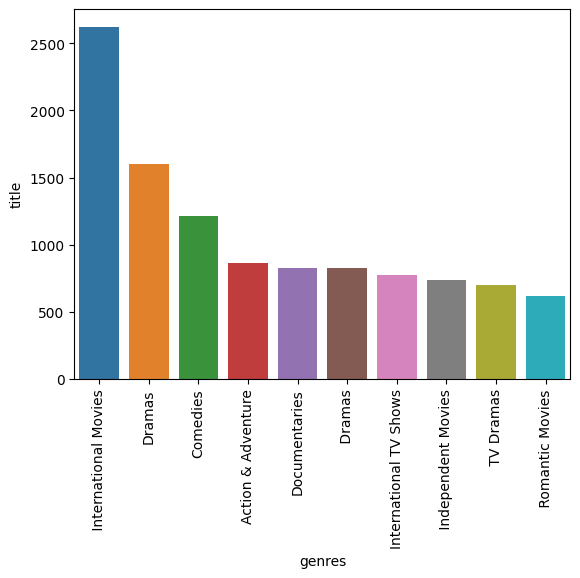

In [209]:
sns.barplot(data=x1, x="genres", y="title")
plt.xticks(rotation=90)
plt.show()

In [210]:
# Top 5 geners for each country
x1=df_combined.groupby(['country','genres'])['title'].nunique().reset_index().sort_values('title',ascending=False)
x_india=x1[x1['country']=='India'].head(10)
x_us=x1[x1['country']=='United States'].head(10)

In [211]:
x_india

,country,genres,title
1560,India,International Movies,837
1589,India,Dramas,415
1584,India,Comedies,274
1556,India,Dramas,254
1559,India,Independent Movies,163
1580,India,Action & Adventure,141
1565,India,Romantic Movies,122
1563,India,Music & Musicals,98
1579,India,Thrillers,98
1582,India,Children & Family Movies,60


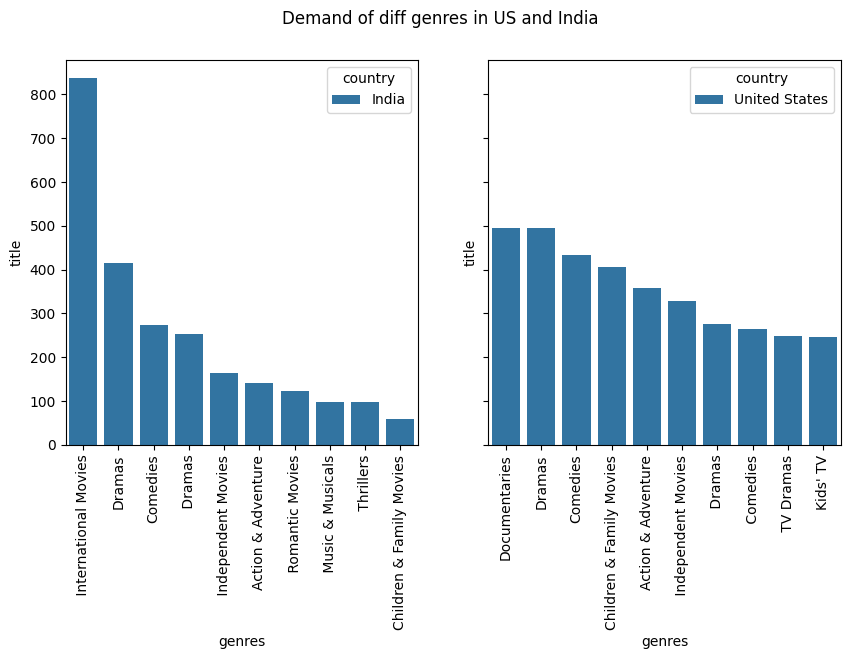

In [212]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Demand of diff genres in US and India')

sns.barplot(ax=axes[0],data=x_india, x="genres", y="title",hue='country')
axes[0].set_xticklabels(x_india['genres'],rotation=90)

sns.barplot(ax=axes[1],data=x_us, x="genres", y="title",hue='country')
axes[1].set_xticklabels(x_us['genres'],rotation=90)
plt.show()

### Which genres increased these Years

In [213]:
df_genre=df_combined[['title','release_year','genres']].drop_duplicates()

In [214]:
df_genre_count=df_genre.groupby(['release_year','genres'])['title'].nunique().reset_index()

In [215]:
df_genre_count['bin_year']=year_bin(df_genre_count,cut_points,labels)

In [216]:
df_bin=df_genre_count.groupby(['bin_year','genres'])['title'].sum().reset_index()

In [217]:
df_genre_bin=df_bin.pivot(index='genres', columns='bin_year', values='title').sort_values('2015-2023',ascending=False).head()
df_genre_bin

bin_year,1925-1935,1935-1945,1945-1955,1955-1965,1965-1975,1975-1985,1985-1995,1995-2005,2005-2015,2015-2023
genres,,,,,,,,,,
International Movies,0,0,1,7,20,54,46,145,802,1549
Dramas,0,0,0,1,4,20,36,99,479,961
Comedies,0,0,0,2,4,19,23,110,409,643
Documentaries,0,2,0,0,2,3,4,12,165,641
International TV Shows,0,0,0,0,1,0,0,16,191,566


->>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Increasing

Documentaries and international TV Shows has increased 288% and 196% recent years 

In [218]:
(641-165)/165*100

288.4848484848485

In [219]:
(566-191)/191*100

196.3350785340314

In [220]:
df_genre_bin.index

Index([' International Movies', 'Dramas', 'Comedies', 'Documentaries',
       'International TV Shows'],
      dtype='object', name='genres')

### Recomendation

*As we dont have Production Budget,Revenue,Views,Rating etc. so we will assume that whatever data we have is working for netflix

1.We should focus on Documentaries and international TV Shows as it has increased 288% and 196% recent years

2.In US demand for Documentaries has increased these recent years 

3.TV-MA and TV-14 has increased 386% and 108% in recent years

4.In India high demand for international Movies

5.TV_Shows Increased 275% in 10 years

6.Duration for movies should be 99 min and tv_shows must be of 2 seasons

7.Director Martin Scorsese must make more movies

8.Actor Alfred Molina has more movies

9.Director Martin Scorsese,Actor Alfred Molina has more movies